In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


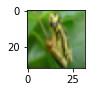

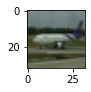

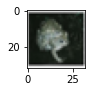

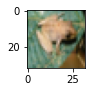

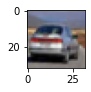

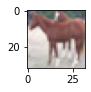

In [5]:
for i in range(232, 238):
    plt.subplot(120 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 148s 378ms/step - loss: 1.6310 - accuracy: 0.3983 - val_loss: 1.1719 - val_accuracy: 0.5835
Epoch 2/20
391/391 [==============================] - 137s 350ms/step - loss: 1.1424 - accuracy: 0.5920 - val_loss: 0.9407 - val_accuracy: 0.6741
Epoch 3/20
 39/391 [=>............................] - ETA: 1:59 - loss: 0.9761 - accuracy: 0.6565

In [16]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

class_labels = dict(zip(classes, names))

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis=-1)

predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 110ms/step


In [17]:
print(predictions)

[[1.21904595e-05 2.10411983e-07 1.13777826e-02 9.63810598e-04
  4.31230903e-01 1.26919467e-02 4.25349845e-06 5.43711603e-01
  6.27740928e-06 9.52454116e-07]
 [1.25137794e-05 1.01460555e-05 1.34666041e-02 5.05711772e-02
  1.06138326e-01 7.75751114e-01 1.15672415e-02 4.19623107e-02
  4.60399053e-04 6.00976564e-05]
 [1.95998808e-07 1.94599056e-06 3.65604537e-05 2.80736107e-03
  1.57665386e-06 9.94867412e-04 9.96155322e-01 7.97872360e-07
  1.10280519e-06 1.49929505e-07]
 [3.65963904e-09 3.21308002e-09 1.63048071e-07 9.87010360e-01
  1.35287282e-05 1.99113911e-05 1.29557680e-02 1.09264562e-08
  9.65618767e-08 1.62249847e-07]
 [7.14105941e-10 9.99998212e-01 8.26148450e-16 3.35047832e-18
  5.78491284e-18 1.26284604e-19 2.30992926e-16 1.04593117e-17
  9.29947035e-08 1.64806102e-06]
 [5.48331602e-09 9.99997258e-01 1.14596483e-11 6.28205848e-14
  3.26727607e-16 1.83147073e-14 6.53874199e-13 1.61796819e-16
  1.08623468e-07 2.66267170e-06]
 [4.31137718e-03 3.01838067e-04 6.28730399e-04 3.92058253e

In [18]:
for image in predictions:
    print(np.sum(image))

0.99999994
0.99999994
0.99999994
1.0
1.0
1.0
0.9999999
1.0
1.0


In [19]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[7 5 6 3 1 1 5 6 8]


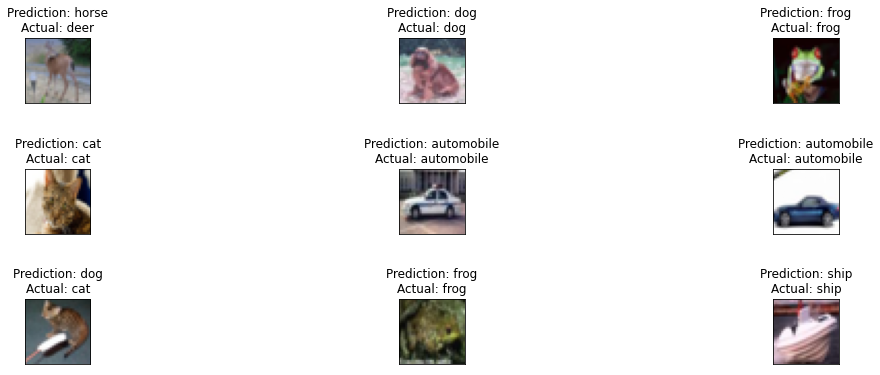

In [22]:
fig, axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img)
    
plt.show()